# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [23]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

Nesse caso vamos precisar do "get_dummies" para transformar as variáveis qualitativas em variáveis indicadoras, ou variáveis dummy.

In [12]:
df = pd.read_csv('housing.csv')

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(9), int64(4)
memory 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [16]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006463,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


A variável que possui maior relação com nossa variável *target* `median_house_value` é `median_income`

### 3. Separe os dados em validação e teste



*   vamos colocar a variável "median_house_value" como variável resposta (y)
*   as demais variáveis são as preditoras, vão ficar no objeto X.


In [17]:
X = df.drop(columns = ['median_house_value']).copy()
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  int64  
 9   ocean_proximity_ISLAND      20640 non-null  int64  
 10  ocean_proximity_NEAR BAY    20640 non-null  int64  
 11  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.9 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [18]:
y =  df.loc[:,'median_house_value']

y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


Separando os dados entre validação e teste:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [20]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [21]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,49
O MSE da árvore com profundidade=8 é: 0,76


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A arvore com maior R-quadrado é a com profundidade 8, parece ser mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

Com plot_tree

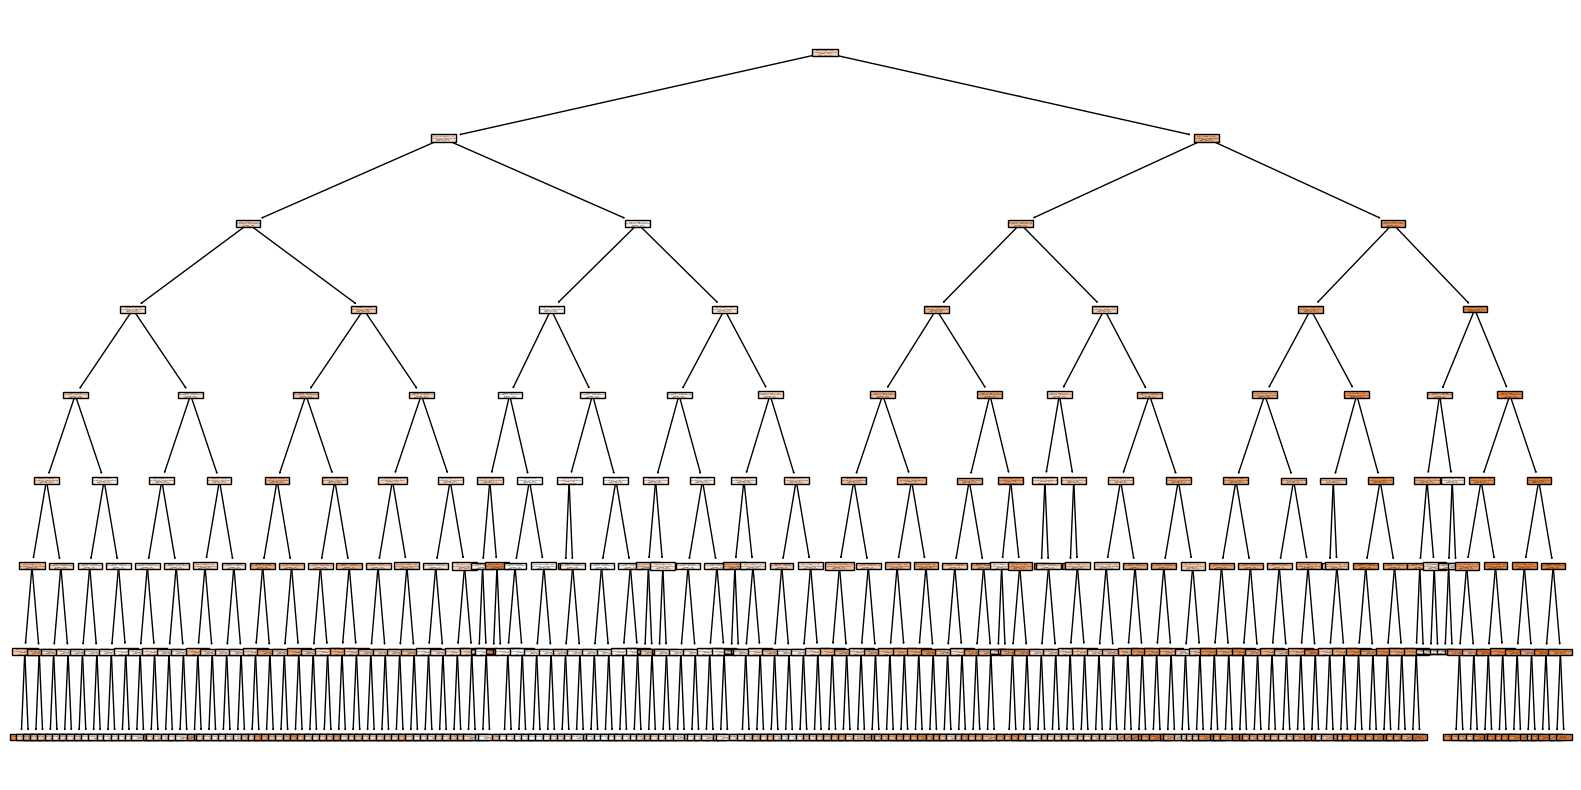

In [29]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(regr_2,
                    feature_names=X.columns,
                    filled=True)

Visualização da forma impressa da árvore

A árvore de regressão pode ser expressa na forma impressa, regra a regra com o comando abaixo:

In [28]:
representacao_textual = tree.export_text(regr_2)
print(representacao_textual)

|--- feature_7 <= 5.08
|   |--- feature_8 <= 0.50
|   |   |--- feature_7 <= 2.92
|   |   |   |--- feature_0 <= -118.30
|   |   |   |   |--- feature_1 <= 37.91
|   |   |   |   |   |--- feature_0 <= -122.40
|   |   |   |   |   |   |--- feature_7 <= 2.24
|   |   |   |   |   |   |   |--- feature_7 <= 0.92
|   |   |   |   |   |   |   |   |--- value: [475000.50]
|   |   |   |   |   |   |   |--- feature_7 >  0.92
|   |   |   |   |   |   |   |   |--- value: [212193.55]
|   |   |   |   |   |   |--- feature_7 >  2.24
|   |   |   |   |   |   |   |--- feature_0 <= -122.42
|   |   |   |   |   |   |   |   |--- value: [347427.86]
|   |   |   |   |   |   |   |--- feature_0 >  -122.42
|   |   |   |   |   |   |   |   |--- value: [259330.77]
|   |   |   |   |   |--- feature_0 >  -122.40
|   |   |   |   |   |   |--- feature_1 <= 37.60
|   |   |   |   |   |   |   |--- feature_5 <= 759.00
|   |   |   |   |   |   |   |   |--- value: [242884.83]
|   |   |   |   |   |   |   |--- feature_5 >  759.00
|   |   |  

Com graphviz

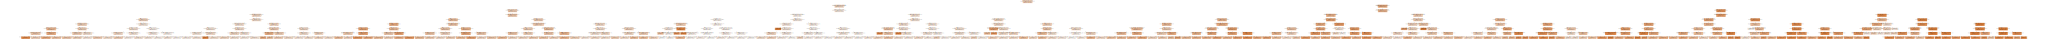

In [25]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


Avaliando a importancia das variáveis:

In [30]:
# Obter a importância das variáveis
importances = regr_2.feature_importances_

# Criar um DataFrame para visualizar as importâncias
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibir as importâncias no terminal
print(importance_df)

                       Feature  Importance
7                median_income    0.598624
8       ocean_proximity_INLAND    0.184453
0                    longitude    0.079408
1                     latitude    0.066250
2           housing_median_age    0.038725
11  ocean_proximity_NEAR OCEAN    0.010945
4               total_bedrooms    0.009049
6                   households    0.005429
5                   population    0.004109
3                  total_rooms    0.003008
9       ocean_proximity_ISLAND    0.000000
10    ocean_proximity_NEAR BAY    0.000000


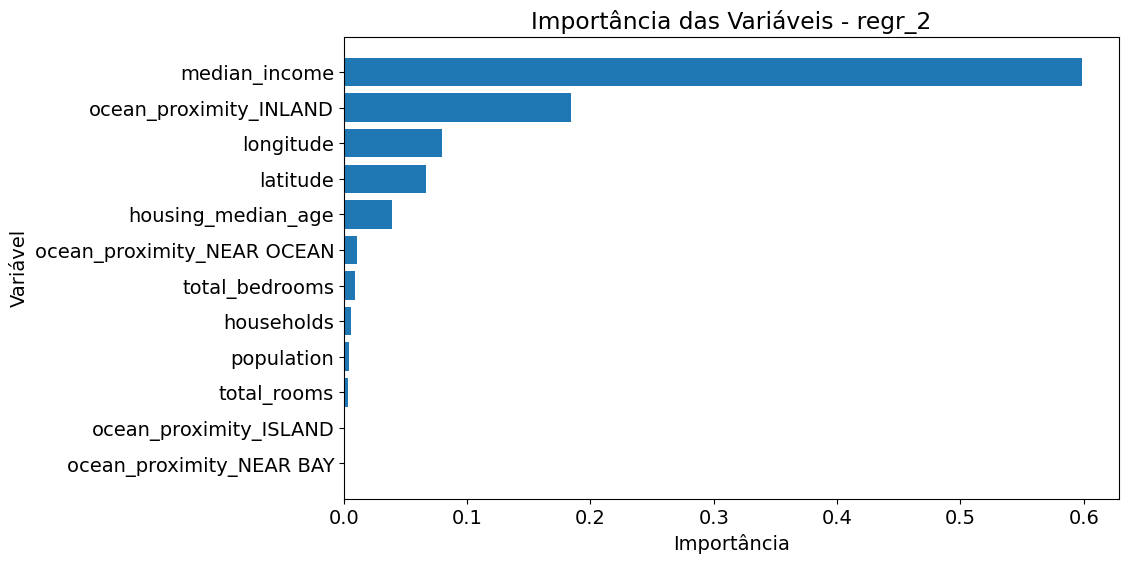

In [32]:
# Visualizar com um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis - regr_2')
plt.gca().invert_yaxis()
plt.show()